### Notebook 2_8

## Filter

#### Student Learning Outcomes
* Learn the low-pass and high-pass filters.
* Learn the concept of pass band and pass-band gain.
--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In Electrical Engineering, flters are used to selectively pass or attenuate specifc frequency
components of a signal. 

A common application of flters is dealing with signals afected by low-frequency or high-frequency noise.

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Low-Pass Filters</h2>
</div>

**A low-pass filter will allow low-freq signals to pass while attenuating higher-freq signals**  

In circuit, it can be further classfied in two types:
* Passive low-pass filter: using only passive components, such as R, L C, to build.

  Its transfer function is $H_{LP}(s) = \dfrac{\omega_c}{s+\omega_c}$. Here, $\omega_c$ is the cut-off freq, but in rad/s.

  Simply saying, by the law of conservation of energy, your output cannot be greater then input (at any $\omega$ rad/s, $|H_LP(j\omega)|\leq 1$, or $|H_LP(j\omega)|\leq 0 dB$). 
* Active low-pass filter: using additional active components, along with external power supply for them, such as Op-Amp.

  Its transfer function is $H_{LP}(s) = \dfrac{\omega_c}{s+\omega_c}\times \mathrm{Gain Factor}$. Here, $\mathrm{Gain Factor}$ is the amplified gain offered by active components.

  Now, your output can be greater then input .
---------

Consider a sine signal with high-freq noise:
    $$x(t)= \underbrace{\sin(3t)}_{\text{desired signal}}+\underbrace{0.2\sin(100t)+0.1\sin(300t)}_{\text{noisy signals}}$$

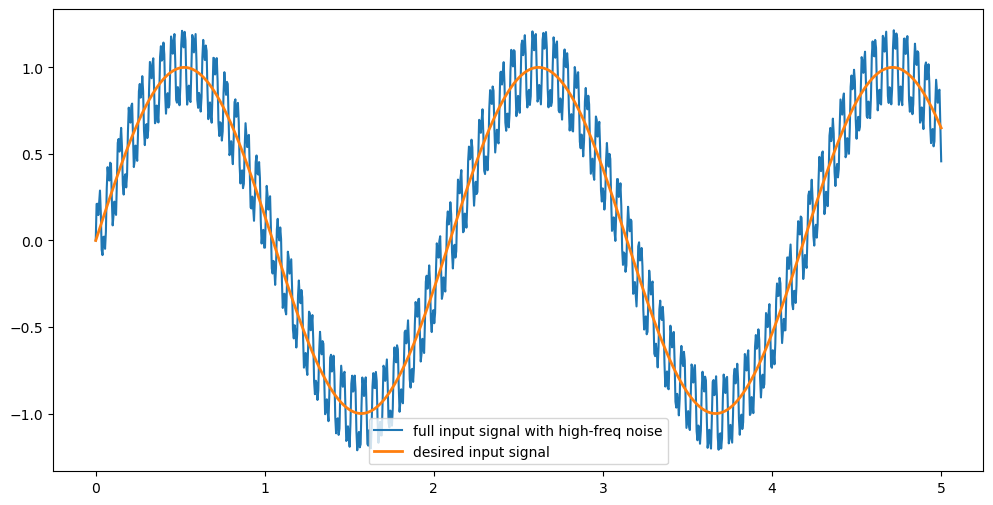

In [2]:
## create x(t)
t_task1 = np.linspace(0, 5, 1000)
x_t_task1_full = np.sin(3*t_task1)+ 0.2*np.sin(100*t_task1)+0.1*np.sin(300*t_task1)
x_t_task1_desired = np.sin(3*t_task1)
plt.figure(figsize=(12, 6))
plt.plot(t_task1, x_t_task1_full, label='full input signal with high-freq noise')
plt.plot(t_task1, x_t_task1_desired, label='desired input signal',linewidth='2')
plt.legend()

Consider this signal $x(t)$ goes thru a passive low-pass filter:
$H_{LP}(s) = \dfrac{\omega_c}{s+\omega_c}$

The $\omega_c$ is 10 rad/s

Now, use ```scipy lsim``` to obtain the output of filter. Plot three in 1 figure
* full input signal with high-freq noise
* desired input signal
* output of the filter

Do you see an smoother signal?

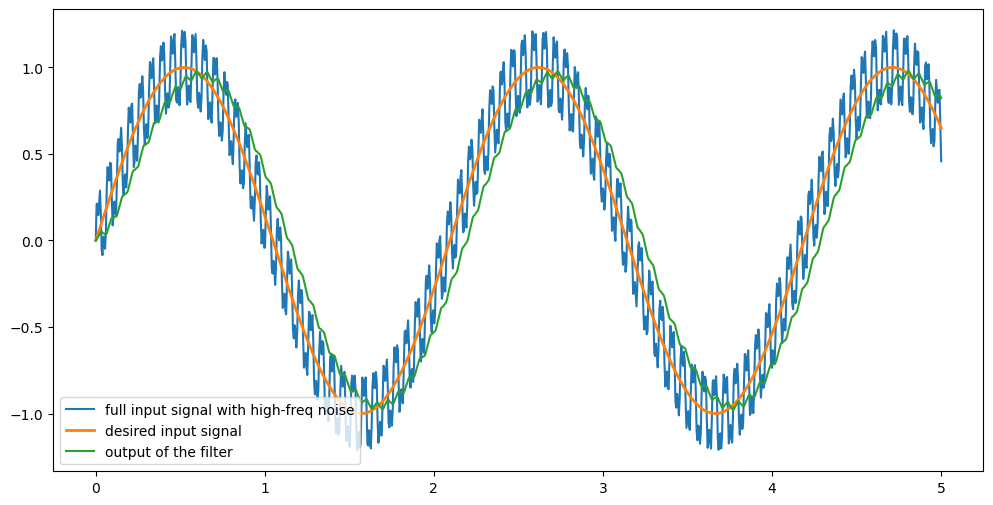

In [4]:
wc = 10
num = [10]
den = [1, 10]
Hs_LP = sig.lti(num, den)
_, y_t_task1_full, _ = sig.lsim(Hs_LP, U=x_t_task1_full, T=t_task1)

plt.figure(figsize=(12, 6))
plt.plot(t_task1, x_t_task1_full, label='full input signal with high-freq noise')
plt.plot(t_task1, x_t_task1_desired, label='desired input signal',linewidth='2')
plt.plot(t_task1, y_t_task1_full, label='output of the filter')
plt.legend()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python plot: 1 pt</strong>
</span>

Next, we detailedly analyze what happen when a signal goes thru a filter. 

We break down the original input into 3 parts and check them individually.

Use Python to calculate and fill the result in the Table. 

The $\mathrm{Filter\: Mag} =\dfrac{\mathrm{Filtered \:(Output) \:Amp}}{\mathrm{Input \:Amp}}$

In [6]:
# An example for sin(3t) part
jw_part1 = 1j*3
H_jw_part1 = 10/(jw_part1 + 10)
Mag_part1 = np.abs(H_jw_part1)
print(Mag_part1)

Input_Amp = 1
Filtered_Amp = Mag_part1 * Input_Amp
print(Filtered_Amp)

# for sin(100t) part
jw_part2 = 1j*100
H_jw_part2 = 10/(jw_part2 + 10)
Mag_part2 = np.abs(H_jw_part2)
print(Mag_part2)

Input_Amp = 0.2
Filtered_Amp2 = Mag_part2 * Input_Amp
print(Filtered_Amp2)

# for sin(300t) part
jw_part3 = 1j*300
H_jw_part3 = 10/(jw_part3 + 10)
Mag_part3 = np.abs(H_jw_part3)
print(Mag_part3)

Input_Amp = 0.1
Filtered_Amp3 = Mag_part3 * Input_Amp
print(Filtered_Amp3)

0.9578262852211514
0.9578262852211514
0.09950371902099892
0.019900743804199785
0.03331483023263848
0.0033314830232638484


| Input Signal parts      | Input Amplitude | Filter Mag | Filtered Amplitude|
| :---------------- | :------: | ----: | ----: |
| $\sin(3t)$       |   1   | 0.958 | 0.958 |
| $0.2\sin(100t)$         |   0.2   | 0.0995 | 0.0199 |
| $0.1\sin(300t)$   |  0.1   | 0.0333 | 0.00333 |

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Table: 1 pt</strong>
</span>

After finishing the table, you should observe that 
* The desired part nearly keep the same amplitude after filtering.
* The other 2 nosiy part drops significantly in amplitude.

Next, plot the Bode Mag for the low-pass filter. Use ```np.logspace(-2,2,1000)``` for freq (Hz) Axis

Text(0, 0.5, 'Mag (dB)')

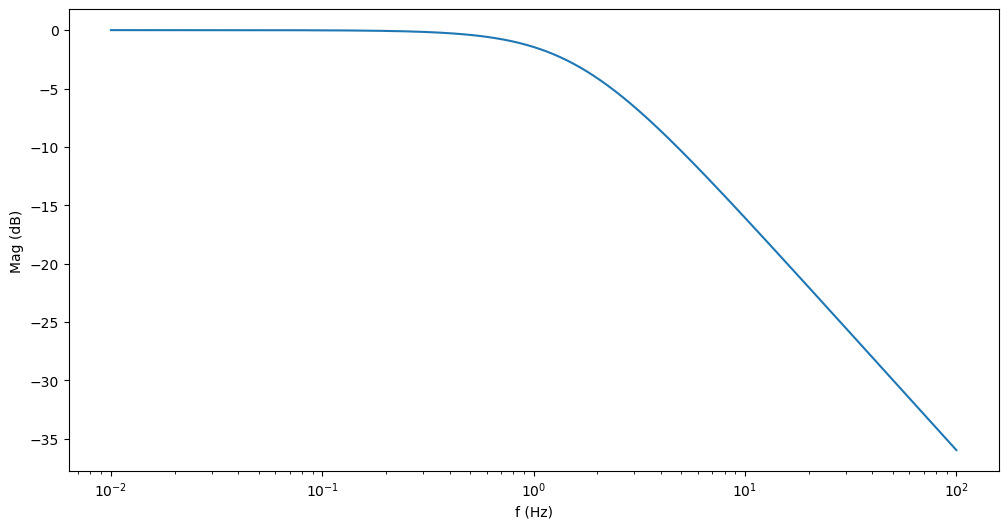

In [16]:
f1 = np.logspace(-2,2,1000)
w1 = 2*np.pi*f1
_, mag1, _ = sig.bode(Hs_LP, w=w1)

plt.figure(figsize=(12, 6))
plt.semilogx(f1, mag1)
plt.xlabel("f (Hz)")
plt.ylabel("Mag (dB)")


<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Bode: 0.5 pt</strong>
</span>

From the bode, you can see 

* From low-freqs to the cut-off freq, it stays at 0 dB, indidating $|H(j\omega)| = 1$. The filtered signal keeps the same as input.
* From the cut-off freq to high freqs, it drops below 0 dB, indidating $|H(j\omega)| < 1$. The filter signal attenuates.


<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: High-Pass Filters</h2>
</div>

**A high-pass filter will allow high-freq signals to pass while attenuating lower-freq signals**  

In circuit, it can be further classfied in two types:
* Passive high-pass filter: using only passive components, such as R, L C, to build.

  Its transfer function is $H_{HP}(s) = \dfrac{s}{s+\omega_c}$. Here, $\omega_c$ is the cut-off freq, but in rad/s.

  Simply saying, by the law of conservation of energy, your output cannot be greater then input (at any $\omega$ rad/s, $|H_HP(j\omega)|\leq 1$, or $|H_HP(j\omega)|\leq 0 dB$). 
* Active high-pass filter: using additional active components, along with external power supply for them, such as Op-Amp.

  Its transfer function is $H_{HP}(s) = \dfrac{s}{s+\omega_c}\times \mathrm{Gain Factor}$. Here, $\mathrm{Gain Factor}$ is the amplified gain offered by active components.

  Now, your output can be greater then input .
---------

Consider a sine signal with high-freq noise:
    $$x(t)= \underbrace{\sin(3t)}_{\text{desired signal}}+\underbrace{0.2\sin(0.1t)+0.1\sin(0.05t)}_{\text{noisy signals}}$$

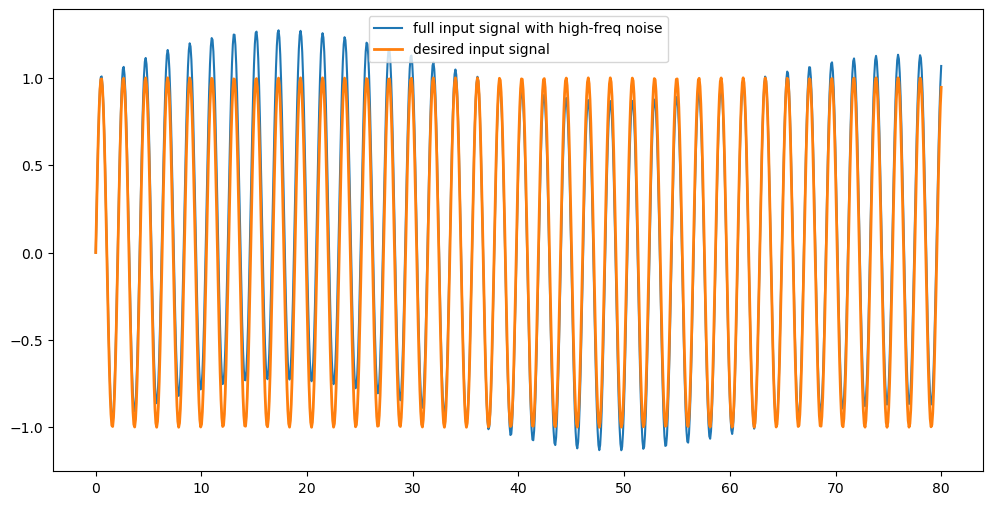

In [10]:
## create x(t)
t_task2 = np.linspace(0, 80, 1000)
x_t_task2_full = np.sin(3*t_task2)+ 0.2*np.sin(0.1*t_task2)+0.1*np.sin(0.05*t_task2)
x_t_task2_desired = np.sin(3*t_task2)
plt.figure(figsize=(12, 6))
plt.plot(t_task2, x_t_task2_full, label='full input signal with high-freq noise')
plt.plot(t_task2, x_t_task2_desired, label='desired input signal',linewidth='2')
plt.legend()

Consider this signal $x(t)$ goes thru a passive high-pass filter:
$H_{HP}(s) = \dfrac{s}{s+\omega_c}$

The $\omega_c$ is 0.5 rad/s

Now, use ```scipy lsim``` to obtain the output of filter. Plot three in 1 figure
* full input signal with low-freq noise
* desired input signal
* output of the filter

Do you see a signal with less low-freq noise (less oscillation in the long run)?

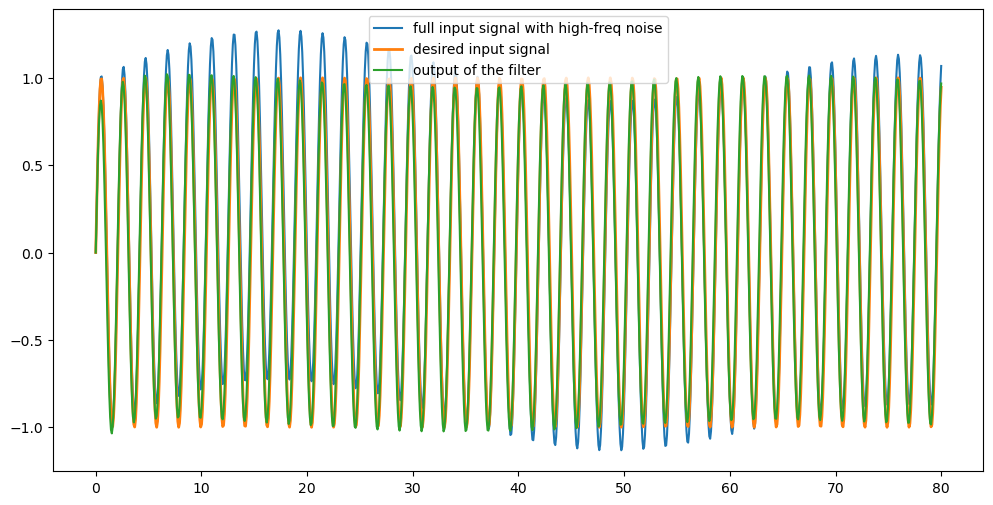

In [12]:
wc = 0.5
num = [1, 0]
den = [1, wc]
Hs_HP = sig.lti(num, den)
_, y_t_task2_full, _ = sig.lsim(Hs_HP, U=x_t_task2_full, T=t_task2)

plt.figure(figsize=(12, 6))
plt.plot(t_task2, x_t_task2_full, label='full input signal with high-freq noise')
plt.plot(t_task2, x_t_task2_desired, label='desired input signal',linewidth='2')
plt.plot(t_task2, y_t_task2_full, label='output of the filter')
plt.legend()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Python plot: 1 pt</strong>
</span>

Next, we repeat the same analysis.

Use Python to calculate and fill the result in the Table. 

In [13]:
# for sin(3t) part
jw_part1 = 1j*3
H_jw_part1 = jw_part1/(jw_part1 + wc)
Mag_part1 = np.abs(H_jw_part1)
print(Mag_part1)

Input_Amp = 1
Filtered_Amp = Mag_part1 * Input_Amp
print(Filtered_Amp)

# for sin(0.1t) part
jw_part2 = 1j*0.1
H_jw_part2 = jw_part2/(jw_part2 + wc)
Mag_part2 = np.abs(H_jw_part2)
print(Mag_part2)

Input_Amp = 0.2
Filtered_Amp2 = Mag_part2 * Input_Amp
print(Filtered_Amp2)

# for sin(0.05t) part
jw_part3 = 1j*0.05
H_jw_part3 = jw_part3/(jw_part3 + wc)
Mag_part3 = np.abs(H_jw_part3)
print(Mag_part3)

Input_Amp = 0.1
Filtered_Amp3 = Mag_part3 * Input_Amp
print(Filtered_Amp3)

0.9863939238321435
0.9863939238321435
0.19611613513818404
0.03922322702763681
0.09950371902099892
0.009950371902099893


| Input Signal parts      | Input Amplitude | Filter Mag | Filtered Amplitude|
| :---------------- | :------: | ----: | ----: |
| $\sin(3t)$       |   1   |  0.986|  0.986|
| $0.2\sin(0.1t)$         |   0.2   | 0.196 | 0.0392 |
| $0.1\sin(0.05t)$   |  0.1   | 0.0995 | 0.00995 |

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Table: 1 pt</strong>
</span>

After finishing the table, you should observe that 
* The desired part nearly keep the same amplitude after filtering.
* The other 2 nosiy part drops significantly in amplitude.

Next, plot the Bode Mag for the high-pass filter. Use ```np.logspace(-2,2,1000)``` for freq (Hz) Axis

Text(0, 0.5, 'Mag (dB)')

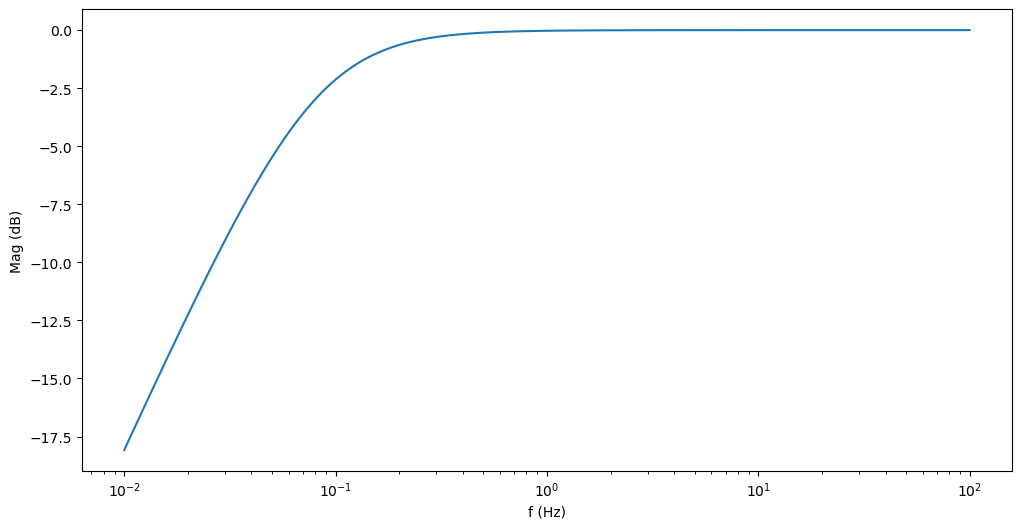

In [17]:
f2 = np.logspace(-2,2,1000)
w2 = 2*np.pi*f2
_, mag2, _ = sig.bode(Hs_HP, w=w2)

plt.figure(figsize=(12, 6))
plt.semilogx(f2, mag2)
plt.xlabel("f (Hz)")
plt.ylabel("Mag (dB)")

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Bode: 0.5 pt</strong>
</span>

From the bode, you can see 

* From the cut-off freq to high freqs, it stays at 0 dB, indidating $|H(j\omega)| = 1$. The filtered signal keeps the same as input.
* From low-freqs to the cut-off freq, it drops below 0 dB, indidating $|H(j\omega)| < 1$. The filtered signal attenuates.

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Filter Terminology</h2>
</div>

**1. Pass band**
- The **pass band** is the frequency range where the filter allows signals to pass with **minimal attenuation**.
- This is typically defined as the range where the gain is within -3 dB of the peak gain.
- For a **low-pass filter**, the pass band is **from DC (0 Hz) up to the cutoff frequency**.
- For a **high-pass filter**, the pass band is **from the cutoff frequency to higher frequencies**.


**2. Pass-band Gain**
- The **pass-band gain** is the gain of the filter within the passband region.
- It is a constant, typically written in **dB**
- If you already have a Bode, you can directly read it on graph.
- For a **low-pass filter**, the pass-band gain is just **the DC Gain**.

  $ = \mathrm{DC\: Gain} = |H(j0)|$
- For a **high-pass filter**, the pass-band gain is:

  $ = |H(j\infty)|$

--------
Specially for high-pass pass-band gain, the $j\infty$ may look wired in calculate. 

Yes, you cannot plug $j\infty$ into Python calculation.

To deal with this issue, we can change all $s$ term in transfer function into $1/s$ term, then:

$\frac{1}{j\omega} = \frac{1}{j\infty} = j0$

So, we can plug $j0$ for all $1/s$ terms.

-------


For example, this is an active high-pass filter:
$$H_{HP}(s)= 5\frac{s}{s+100} = 5\frac{1}{1+100\times 1/s}$$

In [18]:
# An example for pass-band gain
jw_task3_ex1 = 0j
H_task3_ex1 = 5*1/(1+100*jw_task3_ex1)
Gain_task3_ex1 = 20*np.log10(np.abs(H_task3_ex1))
print(Gain_task3_ex1)

13.979400086720377


This is another high-pass filter, in higher order:
$$H_{HP}(s)= 8\frac{s^2}{s^2+9s+40} = 8\frac{1}{1+9\times 1/s+40 \times 1/s^2}$$

In [19]:
# Another example for pass-band gain
jw_task3_ex2 = 0j
H_task3_ex2 = 8*1/(1+9*jw_task3_ex1+ 40 *jw_task3_ex1**2)
Gain_task3_ex2 = 20*np.log10(np.abs(H_task3_ex2))
print(Gain_task3_ex2)

18.06179973983887


<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


